<a href="https://colab.research.google.com/github/ShubhamD-Genzeon/AI_ML_Training_2024/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
dataset='SUV_Purchase.csv'
import pandas as pd
df=pd.read_csv(dataset)

In [2]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df= df.dropna()

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

#Separating features and traget
X= df.drop(['User ID', 'Purchased'], axis=1)
Y = df['Purchased']

print(X)
print(Y)

     Gender  Age  EstimatedSalary
0         1   19            19000
1         1   35            20000
2         0   26            43000
3         0   27            57000
4         1   19            76000
..      ...  ...              ...
395       0   46            41000
396       1   51            23000
397       0   50            20000
398       1   36            33000
399       0   49            36000

[400 rows x 3 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


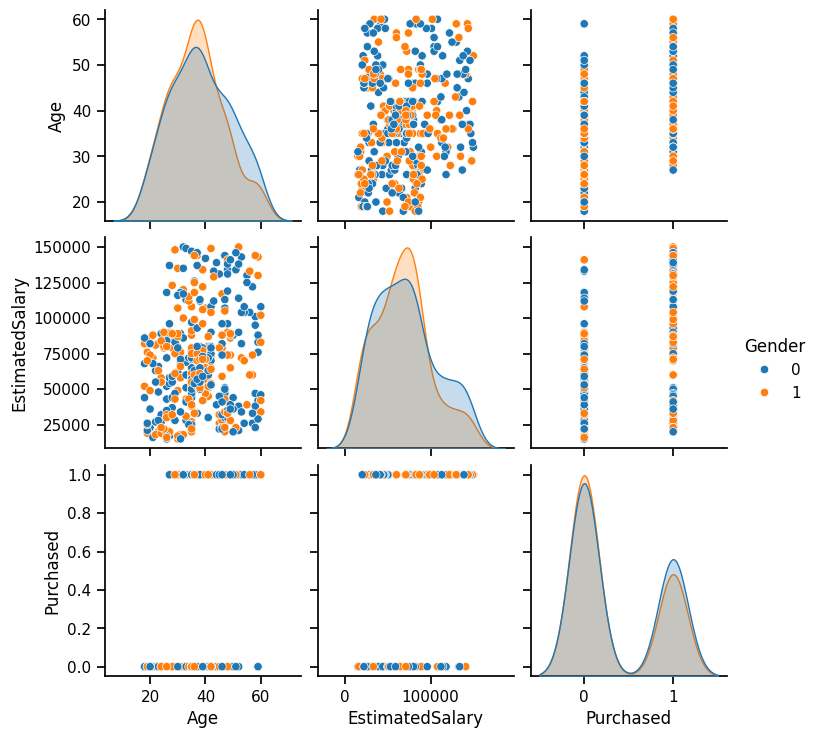

In [5]:
#Understanding the distribution
import seaborn as sns
with sns.plotting_context("notebook"):
  sns.pairplot(df[['Gender','Age','EstimatedSalary','Purchased']],hue='Gender')

<Axes: >

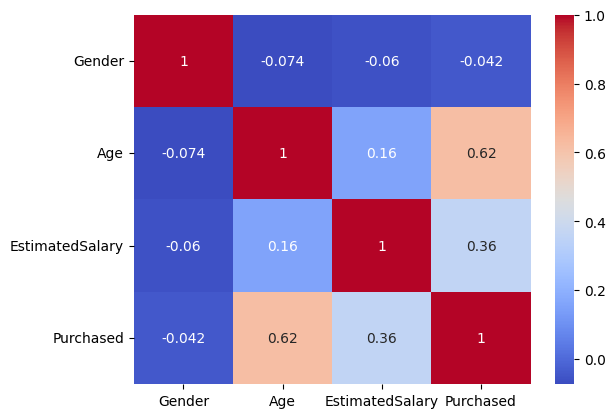

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
columns=['Gender','Age','EstimatedSalary','Purchased']
data=df[columns]
corelation_matrix= data.corr()

sns.heatmap(corelation_matrix,annot=True,cmap='coolwarm')

In [7]:
Purchased_corelations = corelation_matrix["Purchased"]

In [8]:
purchased_corelations_sorted = Purchased_corelations.sort_values(ascending=False)

In [9]:
print(purchased_corelations_sorted)

Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
Gender            -0.042469
Name: Purchased, dtype: float64


In [10]:
#splitting
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [11]:
from sklearn.preprocessing  import StandardScaler
sst=StandardScaler()
X_train =sst.fit_transform(X_train)
X_test=sst.transform(X_test)

In [12]:
X_train

array([[-0.99376941,  0.98948482, -1.18674906],
       [ 1.00626965, -0.92314063,  1.57856288],
       [-0.99376941, -1.40129699, -0.09827521],
       [-0.99376941,  0.32006591, -0.27478449],
       [-0.99376941, -0.54061554,  2.3728546 ],
       [ 1.00626965, -0.06245917,  0.01939763],
       [ 1.00626965, -0.73187808,  1.10787148],
       [-0.99376941,  1.27637864,  1.90216321],
       [-0.99376941,  0.32006591,  0.31357975],
       [ 1.00626965,  0.98948482, -1.06907621],
       [-0.99376941,  1.46764118,  0.37241618],
       [ 1.00626965,  0.32006591,  0.51950724],
       [ 1.00626965,  2.13706009,  0.96078042],
       [ 1.00626965, -0.25372172,  0.28416154],
       [-0.99376941,  0.98948482,  1.46089003],
       [-0.99376941, -1.0187719 , -0.33362091],
       [ 1.00626965,  0.0331721 , -0.24536628],
       [-0.99376941, -0.63624681,  0.04881585],
       [ 1.00626965, -0.44498426, -0.77489409],
       [ 1.00626965,  0.98948482,  0.60776188],
       [ 1.00626965,  2.13706009, -0.804

In [13]:
X_test

array([[ 1.00626965,  2.13706009,  0.40183439],
       [ 1.00626965, -0.82750935, -0.24536628],
       [-0.99376941,  2.04142882, -1.18674906],
       [ 1.00626965,  1.08511609,  0.13707048],
       [ 1.00626965, -1.11440317,  0.31357975],
       [-0.99376941, -1.59255953, -0.03943879],
       [-0.99376941, -1.68819081, -1.36325834],
       [-0.99376941, -0.06245917,  0.25474333],
       [-0.99376941,  1.94579755,  0.75485294],
       [-0.99376941, -1.87945335,  0.49008903],
       [ 1.00626965, -0.25372172,  0.16648869],
       [-0.99376941,  0.98948482,  1.81390857],
       [-0.99376941, -0.34935299, -1.30442191],
       [ 1.00626965, -1.11440317, -1.59860403],
       [-0.99376941,  1.56327246,  1.13728969],
       [-0.99376941, -0.54061554,  0.49008903],
       [-0.99376941,  0.32006591, -0.18652985],
       [-0.99376941,  0.41569719,  0.60776188],
       [-0.99376941,  0.79822228, -0.83373052],
       [ 1.00626965,  0.41569719,  2.34343639],
       [-0.99376941, -0.34935299,  0.078

In [14]:
Y_train

19     1
97     1
62     0
325    0
7      1
      ..
26     1
80     0
377    0
154    0
225    0
Name: Purchased, Length: 320, dtype: int64

In [15]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression model
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, Y_train)

LogisticRegression()

In [16]:
coefficients=model.coef_
print(coefficients)

[[0.30982075 2.43399739 1.26772044]]


In [17]:
intercept=model.intercept_
print(intercept)

[-1.17347857]


In [18]:
from sklearn.metrics import accuracy_score
Y_pred = model.predict(X_test)

In [19]:
Y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [20]:
acc=accuracy_score(Y_test,Y_pred)
print(acc)

0.85


In [21]:
Gender=int(input("Enter the number for gender (male:1,femmale:0) "))
Age=int(input("enter the age"))
EstimatedSalary=int(input("enter the estimated salary"))
coefficients=model.coef_[0]
intercept=model.intercept_[0]
Prediction=intercept+(coefficients[0]*Gender)+(coefficients[1]*Age)+(coefficients[2]*EstimatedSalary)
Prediction

Enter the number for gender (male:1,femmale:0) 0
enter the age32
enter the estimated salary150000


190234.78048190507

In [22]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Convert negative values to probabilities using sigmoid function
probabilities = sigmoid(Prediction)

print(probabilities)


1.0
